1) Initialization

!pip install plotly_express==0.4.0 -q

!pip install seaborn==0.11.0 -q

!pip install jupyterlab "ipywidgets>=7.5" -q

- 1.1) We begin with the Import of the different libraries we will use and their configurations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [2]:
data = pd.read_csv('Forza_Horizon_Cars.csv')

2) Cleaning the data

In [3]:
df=pd.DataFrame(data=data)

In [4]:
print('Number of lines before treatment: ', df.shape[0])
df = df.dropna(subset=['In_Game_Price'])
print('Number of lines after treatment: ', df.shape[0])

Number of lines before treatment:  539
Number of lines after treatment:  539


In [5]:
print("Number of rows : {}".format(df.shape[0]))
print("Number of columns : {}".format(df.shape[1]))

Number of rows : 539
Number of columns : 22


In [6]:
display(df.head())

,Car_Image,Name_and_model,Model_type,In_Game_Price,car_source,stock_specs,Stock_Rating,Drive_Type,speed,handling,...,braking,Offroad,Top_Speed,0-60_Mph,0-100_Mph,g-force,car_source_1,car_source_2,Horse_Power,Weight_lbs
0,https://www.kudosprime.com/fh5/images/cars/sid...,2001 Acura Integra Type R,RETRO HOT HATCH,"25,000",Autoshow,C,596.0,FWD,5.6,5.1,...,3.4,5.1,155.5 Mph,6.2s,14.7s,0.90 g,info_not_found,info_not_found,195,"2,639"
1,https://www.kudosprime.com/fh5/images/cars/sid...,2002 Acura RSX Type S,RETRO HOT HATCH,"25,000",Autoshow,C,585.0,FWD,5.6,5.1,...,3.5,5.3,info_not_found,info_not_found,info_not_found,info_not_found,info_not_found,info_not_found,200,"2,820"
2,https://www.kudosprime.com/fh5/images/cars/sid...,2017 Acura NSX,MODERN SUPERCARS,"170,000",Autoshow,S1,831.0,AWD,7.0,7.0,...,7.1,4.7,info_not_found,info_not_found,info_not_found,info_not_found,info_not_found,info_not_found,573,"3,803"
3,https://www.kudosprime.com/fh5/images/cars/sid...,1973 Alpine A110 1600s,CLASSIC RALLY,"98,000",Autoshow,C,550.0,RWD,5.0,4.4,...,3.0,5.3,138.0 Mph,7.0s,20.6s,0.84 g,info_not_found,info_not_found,123,"1,576"
4,https://www.kudosprime.com/fh5/images/cars/sid...,2017 Alpine A110,MODERN SPORTS CARS,"67,500",Wheelspin,B,694.0,RWD,6.0,6.4,...,4.2,4.2,info_not_found,info_not_found,info_not_found,info_not_found,Season Event,Festival Playlist,248,"2,432"


In [7]:
data_desc = df.describe(include='all')
display(data_desc)

,Car_Image,Name_and_model,Model_type,In_Game_Price,car_source,stock_specs,Stock_Rating,Drive_Type,speed,handling,...,braking,Offroad,Top_Speed,0-60_Mph,0-100_Mph,g-force,car_source_1,car_source_2,Horse_Power,Weight_lbs
count,539,539,539,539,539,539,539,539,539,539,...,539,539,539,539,539,539,539,539,539,539
unique,539,539,39,164,9,7,348,4,76,73,...,81,64,131,58,94,65,6,5,311,401
top,https://www.kudosprime.com/fh5/images/cars/sid...,1990 Vauxhall Lotus Carlton,RETRO SPORTS CARS,"500,000",Autoshow,S1,100.0,RWD,7.6,5.5,...,10.0,4.6,info_not_found,info_not_found,info_not_found,info_not_found,Wheelspin,info_not_found,450,"2,800"
freq,1,1,36,41,431,122,11,348,21,21,...,21,34,399,399,399,399,390,416,9,9


In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 538
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Car_Image       539 non-null    object
 1   Name_and_model  539 non-null    object
 2   Model_type      539 non-null    object
 3   In_Game_Price   539 non-null    object
 4   car_source      539 non-null    object
 5   stock_specs     539 non-null    object
 6   Stock_Rating    539 non-null    object
 7   Drive_Type      539 non-null    object
 8   speed           539 non-null    object
 9   handling        539 non-null    object
 10  acceleration    539 non-null    object
 11  launch          539 non-null    object
 12  braking         539 non-null    object
 13  Offroad         539 non-null    object
 14  Top_Speed       539 non-null    object
 15  0-60_Mph        539 non-null    object
 16  0-100_Mph       539 non-null    object
 17  g-force         539 non-null    object
 18  car_source

None

In [9]:
#Dropping columns with unreadable/useless infos
columns = ['Car_Image', 'stock_specs', 'g-force', "Drive_Type"]
df.drop(columns, inplace=True, axis=1)

In [10]:
df.head()

,Name_and_model,Model_type,In_Game_Price,car_source,Stock_Rating,speed,handling,acceleration,launch,braking,Offroad,Top_Speed,0-60_Mph,0-100_Mph,car_source_1,car_source_2,Horse_Power,Weight_lbs
0,2001 Acura Integra Type R,RETRO HOT HATCH,"25,000",Autoshow,596.0,5.6,5.1,3.9,3.1,3.4,5.1,155.5 Mph,6.2s,14.7s,info_not_found,info_not_found,195,"2,639"
1,2002 Acura RSX Type S,RETRO HOT HATCH,"25,000",Autoshow,585.0,5.6,5.1,3.9,3.0,3.5,5.3,info_not_found,info_not_found,info_not_found,info_not_found,info_not_found,200,"2,820"
2,2017 Acura NSX,MODERN SUPERCARS,"170,000",Autoshow,831.0,7.0,7.0,9.2,10.0,7.1,4.7,info_not_found,info_not_found,info_not_found,info_not_found,info_not_found,573,"3,803"
3,1973 Alpine A110 1600s,CLASSIC RALLY,"98,000",Autoshow,550.0,5.0,4.4,4.1,3.1,3.0,5.3,138.0 Mph,7.0s,20.6s,info_not_found,info_not_found,123,"1,576"
4,2017 Alpine A110,MODERN SPORTS CARS,"67,500",Wheelspin,694.0,6.0,6.4,5.4,5.7,4.2,4.2,info_not_found,info_not_found,info_not_found,Season Event,Festival Playlist,248,"2,432"


In [11]:
#replacing "Mph" with blank text to make the column usable as a float
df["Top_Speed"]= df['Top_Speed'].str.replace('Mph', '').astype(str)
df["0-60_Mph"]= df['0-60_Mph'].str.replace('s', '').astype(str)
df["0-100_Mph"]= df['0-100_Mph'].str.replace('s', '').astype(str)

In [12]:
#replacing spaces with and underscore to make the column usable as a float
df["Top_Speed"]= df['Top_Speed'].str.replace(' ', '').astype(str)
df["Model_type"] = df["Model_type"].str.replace(' ', '_').astype(str)
df["Name_and_model"] = df["Name_and_model"].str.replace(' ', '_').astype(str)
df["car_source_1"] = df["car_source_1"].str.replace(' ', '_').astype(str)
df["car_source_2"] = df["car_source_2"].str.replace(' ', '_').astype(str)

In [13]:
df.head()

,Name_and_model,Model_type,In_Game_Price,car_source,Stock_Rating,speed,handling,acceleration,launch,braking,Offroad,Top_Speed,0-60_Mph,0-100_Mph,car_source_1,car_source_2,Horse_Power,Weight_lbs
0,2001_Acura_Integra_Type_R,RETRO_HOT_HATCH,"25,000",Autoshow,596.0,5.6,5.1,3.9,3.1,3.4,5.1,155.5,6.2,14.7,info_not_found,info_not_found,195,"2,639"
1,2002_Acura_RSX_Type_S,RETRO_HOT_HATCH,"25,000",Autoshow,585.0,5.6,5.1,3.9,3.0,3.5,5.3,info_not_found,info_not_found,info_not_found,info_not_found,info_not_found,200,"2,820"
2,2017_Acura_NSX,MODERN_SUPERCARS,"170,000",Autoshow,831.0,7.0,7.0,9.2,10.0,7.1,4.7,info_not_found,info_not_found,info_not_found,info_not_found,info_not_found,573,"3,803"
3,1973_Alpine_A110_1600s,CLASSIC_RALLY,"98,000",Autoshow,550.0,5.0,4.4,4.1,3.1,3.0,5.3,138.0,7.0,20.6,info_not_found,info_not_found,123,"1,576"
4,2017_Alpine_A110,MODERN_SPORTS_CARS,"67,500",Wheelspin,694.0,6.0,6.4,5.4,5.7,4.2,4.2,info_not_found,info_not_found,info_not_found,Season_Event,Festival_Playlist,248,"2,432"


In [14]:
#converting text into numbers to process into float
df["Stock_Rating"]= df["Stock_Rating"].str.replace('info_not_found', '0').astype(str)
df["car_source"]= df["car_source"].str.replace('This info will be available soon', 'No info').astype(str)
df["car_source_1"]= df["car_source_1"].str.replace('info_not_found', 'No info').astype(str)
df["car_source_2"]= df["car_source_2"].str.replace('info_not_found', 'No info').astype(str)
df["Top_Speed"]= df["Top_Speed"].str.replace('info_not_found', '0').astype(str)
df["0-60_Mph"]= df['0-60_Mph'].str.replace('info_not_found', '0').astype(str)
df["0-100_Mph"]= df['0-100_Mph'].str.replace('info_not_found', '0').astype(str)
df["car_source_1"] = df["car_source_1"].str.replace('info_not_found', '0').astype(str)
df["car_source_2"] = df["car_source_2"].str.replace('info_not_found', '0').astype(str)
df["speed"] = df["speed"].str.replace('info_not_found', '0').astype(str)
df["handling"] = df["handling"].str.replace('info_not_found', '0').astype(str)
df["acceleration"] = df["acceleration"].str.replace('info_not_found', '0').astype(str)
df["launch"] = df["launch"].str.replace('info_not_found', '0').astype(str)
df["braking"] = df["braking"].str.replace('info_not_found', '0').astype(str)
df["Offroad"] = df["Offroad"].str.replace('info_not_found', '0').astype(str)
#df['In_Game_Price'] = df['In_Game_Price'].astype(float)

In [15]:
#removing commas errors and converting into float
df['In_Game_Price'] = [float(str(i).replace(",", "")) for i in df['In_Game_Price']]
df['Stock_Rating'] = [float(str(i).replace(",", "")) for i in df['Stock_Rating']]
df['speed'] = [float(str(i).replace(",", "")) for i in df['speed']]
df['handling'] = [float(str(i).replace(",", "")) for i in df['handling']]
df['acceleration'] = [float(str(i).replace(",", "")) for i in df['acceleration']]
df['launch'] = [float(str(i).replace(",", "")) for i in df['launch']]
df['braking'] = [float(str(i).replace(",", "")) for i in df['braking']]
df['Weight_lbs'] = [float(str(i).replace(",", "")) for i in df['Weight_lbs']]
df['Offroad'] = [float(str(i).replace(",", "")) for i in df['Offroad']]

In [16]:
#String 0 into NaN Values
df['Stock_Rating'] = pd.to_numeric(df['Stock_Rating'], errors='coerce')
df['Top_Speed'] = pd.to_numeric(df['Top_Speed'], errors='coerce')
df['0-60_Mph'] = pd.to_numeric(df['0-60_Mph'], errors='coerce')
df['0-100_Mph'] = pd.to_numeric(df['0-100_Mph'], errors='coerce')
df['Horse_Power'] = pd.to_numeric(df['Horse_Power'], errors='coerce')
df['Weight_lbs'] = pd.to_numeric(df['Weight_lbs'], errors='coerce')
df['Offroad'] = pd.to_numeric(df['Weight_lbs'], errors='coerce')

In [17]:
df.dtypes

Name_and_model     object
Model_type         object
In_Game_Price     float64
car_source         object
Stock_Rating      float64
speed             float64
handling          float64
acceleration      float64
launch            float64
braking           float64
Offroad           float64
Top_Speed         float64
0-60_Mph          float64
0-100_Mph         float64
car_source_1       object
car_source_2       object
Horse_Power       float64
Weight_lbs        float64
dtype: object

In [18]:
df["car_source_1"].replace({0:"Wheelspin", 1:"No info", 2:"Season_Event", 3:"Festival_Playlist", 4:"Accolade", 5:"Other"}, inplace=True)
df.car_source_1.value_counts(dropna=True)

Wheelspin            390
No info               62
Season_Event          42
Accolade              21
Festival_Playlist     21
Other                  3
Name: car_source_1, dtype: int64

In [19]:
display(100*df.isnull().sum()/df.shape[0])

Name_and_model    0.000000
Model_type        0.000000
In_Game_Price     0.000000
car_source        0.000000
Stock_Rating      0.000000
speed             0.000000
handling          0.000000
acceleration      0.000000
launch            0.000000
braking           0.000000
Offroad           0.000000
Top_Speed         0.000000
0-60_Mph          0.000000
0-100_Mph         0.556586
car_source_1      0.000000
car_source_2      0.000000
Horse_Power       6.864564
Weight_lbs        0.000000
dtype: float64

In [20]:
print('Number of lines before treatment: ', df.shape[0])
df = df.dropna(subset=['Horse_Power'])
print('Number of lines after treatment: ', df.shape[0])

Number of lines before treatment:  539
Number of lines after treatment:  502


- 3) Exploring the data

No huge correlations between the data beside the fact that Horse Power and Stock Rating are related.


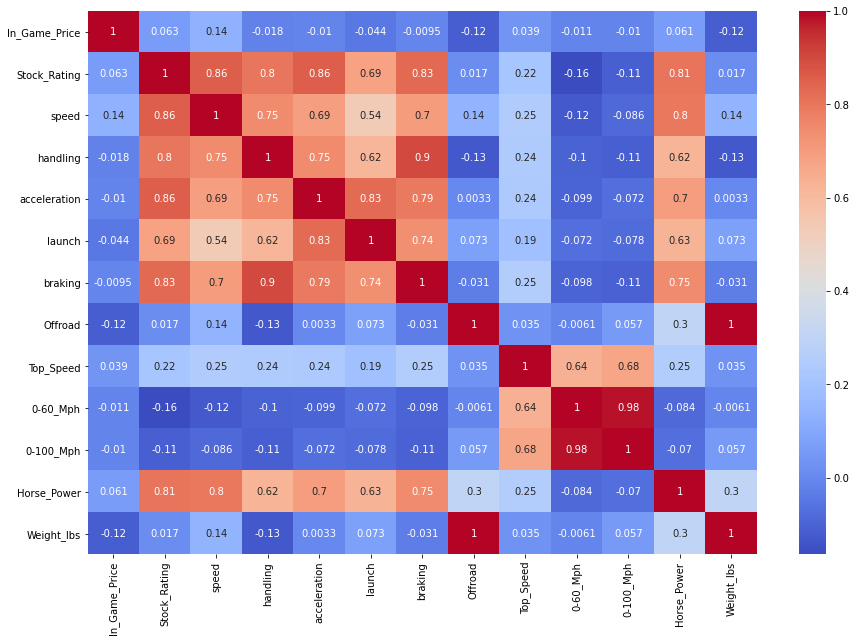

In [21]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm');
print("No huge correlations between the data beside the fact that Horse Power and Stock Rating are related.")

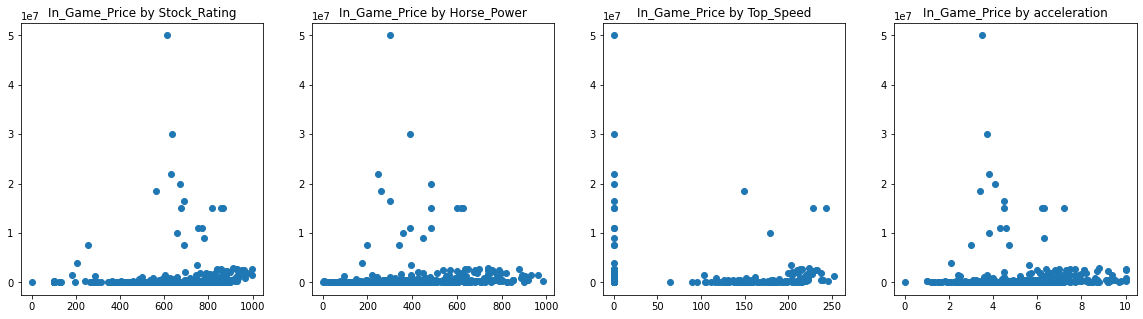

In [22]:
fig, ax = plt.subplots(1, 4, figsize= (20,5))
ax[0].scatter(df['Stock_Rating'], df['In_Game_Price'])
ax[0].set_title('In_Game_Price by Stock_Rating')
ax[1].scatter(df['Horse_Power'], df['In_Game_Price'])
ax[1].set_title('In_Game_Price by Horse_Power')
ax[2].scatter(df['Top_Speed'], df['In_Game_Price'])
ax[2].set_title('In_Game_Price by Top_Speed')
ax[3].scatter(df['acceleration'], df['In_Game_Price'])
ax[3].set_title('In_Game_Price by acceleration')

plt.show();

In [23]:
model_price=df.groupby('Model_type').sum()['In_Game_Price'].sort_values(ascending=False)
model_price

Model_type
CLASSIC_RACERS           173380000.0
RETRO_SUPERCARS           56442000.0
VINTAGE_RACERS            51800000.0
RARE_CLASSICS             35115000.0
EXTREME_TRACK_TOYS        26500000.0
HYPERCARS                 24360000.0
MODERN_SUPERCARS          11352000.0
TRACK_TOYS                 8083000.0
RALLY_MONSTERS             7845000.0
SUPER_GT                   5310000.0
UNLIMITED_OFFROAD          4475000.0
CLASSIC_MUSCLE             3331000.0
RETRO_SPORTS_CARS          3318000.0
SUPER_SALOONS              2854000.0
PICK-UP_&_4X4'S            2397000.0
DRIFT_CARS                 2150000.0
SPORTS_UTILITY_HEROES      1701500.0
CLASSIC_RALLY              1284000.0
OFFROAD                    1250000.0
RETRO_SALOONS              1152000.0
MODERN_SPORTS_CARS         1139300.0
GT_CARS                    1116000.0
MODERN_MUSCLE              1055000.0
CLASSIC_SPORTS_CARS         942000.0
RETRO_RALLY                 784000.0
RODS_AND_CUSTOMS            552000.0
UNLIMITED_BUGGIES          

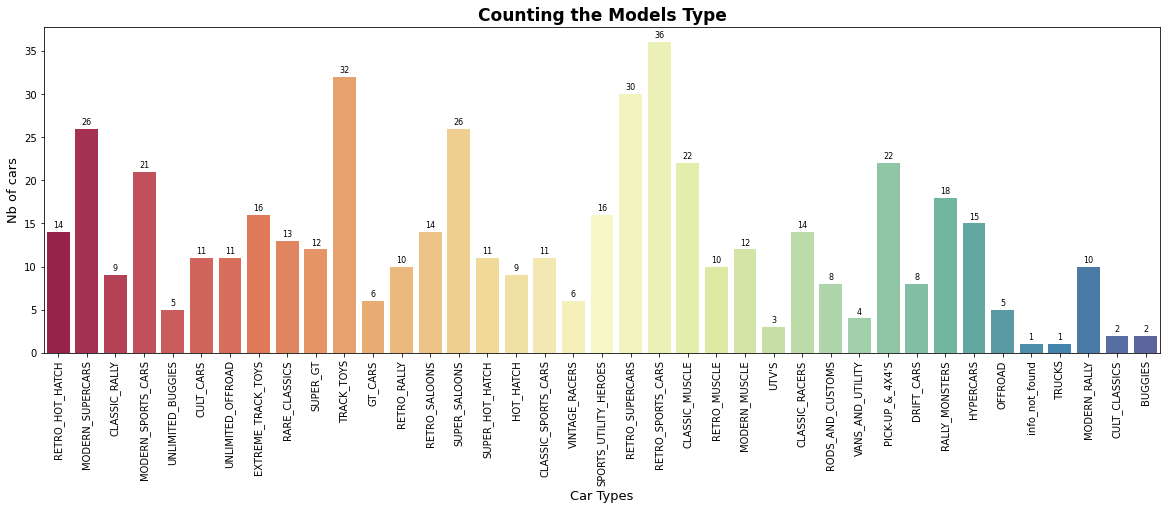

In [24]:
# Visualisation of Model_type 
countplt, ax = plt.subplots(figsize = (20,6))
ax = sns.countplot(x = df["Model_type"], palette='Spectral')
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=10, 
                    rotation=90)
ax.set_title("Counting the Models Type", fontsize = 17, fontweight='bold')
ax.set_ylabel("Nb of cars", fontsize=13)
ax.set_xlabel("Car Types", fontsize=13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.5,rect.get_height(),horizontalalignment='center', fontsize = 8)

We can see the most represented models type are: 
- Retro_Sports_Cars
- Retro_Supercars
- Track_Toys
- Modern Super_Cars 

In [25]:
source_price=df.groupby('car_source_1').sum()['In_Game_Price'].sort_values(ascending=False)
source_price

car_source_1
Wheelspin            269142300.0
No info              100765000.0
Season_Event          40713500.0
Festival_Playlist     19190000.0
Accolade               3073000.0
Other                   620000.0
Name: In_Game_Price, dtype: float64

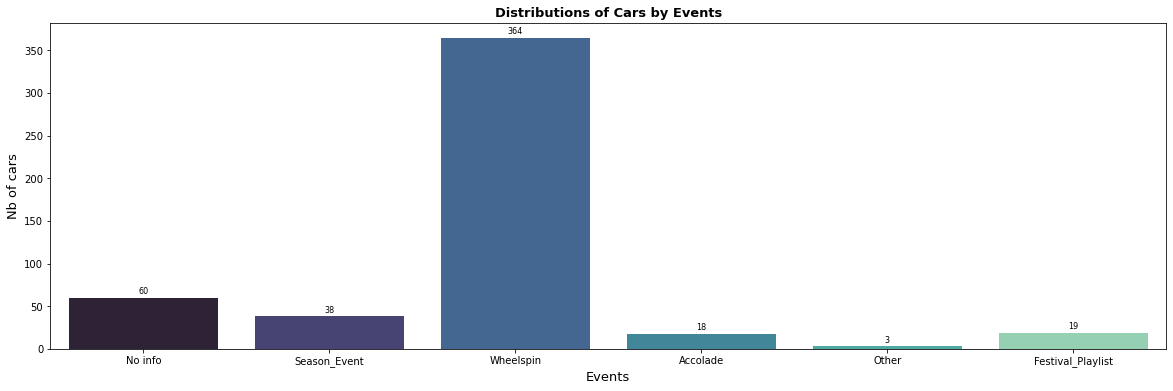

In [26]:
#Visualisation des tranches d'âge des participants
countplt, ax = plt.subplots(figsize = (20,6))
ax = sns.countplot(x = df["car_source_1"], palette='mako')
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=10, 
                    rotation=0)
ax.set_title("Distributions of Cars by Events", fontsize = 13, fontweight='bold')
ax.set_ylabel("Nb of cars", fontsize=13)
ax.set_xlabel("Events", fontsize=13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 8)

Car are mainly distributed by the following events: 
- Wheelspin
- Season_Event
- Festival_Playlist

- From what we know now, we can assume that a fast car obtained from the Wheelspin event wich is either a Classic Racers, Retro SuperCars, Vintage Racers would be pretty expensive in Forza.")
we will try to demonstrate that by building two linear regression models.")
The first one with cars caracteristics features")
And the second model will be build upon their obtainability and type.")

In [ ]:
#Handling lines containing invalid values or outliers

In [29]:
df.head()

,Name_and_model,Model_type,In_Game_Price,car_source,Stock_Rating,speed,handling,acceleration,launch,braking,Offroad,Top_Speed,0-60_Mph,0-100_Mph,car_source_1,car_source_2,Horse_Power,Weight_lbs
0,2001_Acura_Integra_Type_R,RETRO_HOT_HATCH,25000.0,Autoshow,596.0,5.6,5.1,3.9,3.1,3.4,2639.0,155.5,6.2,14.7,No info,No info,195.0,2639.0
1,2002_Acura_RSX_Type_S,RETRO_HOT_HATCH,25000.0,Autoshow,585.0,5.6,5.1,3.9,3.0,3.5,2820.0,0.0,0.0,0.0,No info,No info,200.0,2820.0
2,2017_Acura_NSX,MODERN_SUPERCARS,170000.0,Autoshow,831.0,7.0,7.0,9.2,10.0,7.1,3803.0,0.0,0.0,0.0,No info,No info,573.0,3803.0
3,1973_Alpine_A110_1600s,CLASSIC_RALLY,98000.0,Autoshow,550.0,5.0,4.4,4.1,3.1,3.0,1576.0,138.0,7.0,20.6,No info,No info,123.0,1576.0
4,2017_Alpine_A110,MODERN_SPORTS_CARS,67500.0,Wheelspin,694.0,6.0,6.4,5.4,5.7,4.2,2432.0,0.0,0.0,0.0,Season_Event,Festival_Playlist,248.0,2432.0


In [30]:
num_col = ['Stock_Rating', 'speed', 'handling', 'acceleration', "launch", "braking", "Offroad", "Top_Speed", "0-60_Mph", "0-100_Mph", "Horse_Power", "Weight_lbs"]
for col in num_col:
    print ('Standard deviation for', col, 'is', round(df[col].std(),2))

Standard deviation for Stock_Rating is 187.48
Standard deviation for speed is 1.48
Standard deviation for handling is 1.63
Standard deviation for acceleration is 1.82
Standard deviation for launch is 2.11
Standard deviation for braking is 2.08
Standard deviation for Offroad is 1145.16
Standard deviation for Top_Speed is 79.78
Standard deviation for 0-60_Mph is 2.95
Standard deviation for 0-100_Mph is 6.39
Standard deviation for Horse_Power is 210.64
Standard deviation for Weight_lbs is 1145.16


In [31]:
print('Number of lines remaining before treatment: ', df.shape[0])
for col in num_col: 
    to_keep = (df[col] > df[col].mean() - 3*df[col].std()  ) & (df[col] < df[col].mean() + 3*df[col].std())
    df = df.loc[to_keep,:] 
    print('Deleting outliers done for the column', col, '- Number of lines remaining : ', df.shape[0])
print()

Number of lines remaining before treatment:  502
Deleting outliers done for the column Stock_Rating - Number of lines remaining :  489
Deleting outliers done for the column speed - Number of lines remaining :  489
Deleting outliers done for the column handling - Number of lines remaining :  489
Deleting outliers done for the column acceleration - Number of lines remaining :  489
Deleting outliers done for the column launch - Number of lines remaining :  489
Deleting outliers done for the column braking - Number of lines remaining :  489
Deleting outliers done for the column Offroad - Number of lines remaining :  483
Deleting outliers done for the column Top_Speed - Number of lines remaining :  483
Deleting outliers done for the column 0-60_Mph - Number of lines remaining :  475
Deleting outliers done for the column 0-100_Mph - Number of lines remaining :  460
Deleting outliers done for the column Horse_Power - Number of lines remaining :  460
Deleting outliers done for the column Weigh

In [32]:
#Checking the missing values one last time
print("Percentage of missing values: \n")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 



Name_and_model    0.0
Model_type        0.0
In_Game_Price     0.0
car_source        0.0
Stock_Rating      0.0
speed             0.0
handling          0.0
acceleration      0.0
launch            0.0
braking           0.0
Offroad           0.0
Top_Speed         0.0
0-60_Mph          0.0
0-100_Mph         0.0
car_source_1      0.0
car_source_2      0.0
Horse_Power       0.0
Weight_lbs        0.0
dtype: float64

In [33]:
# Separate target variable Y from features X
target_name = 'In_Game_Price'

print("Separating labels from features...")
Y = df.loc[:,target_name]
X = df.loc[:,[c for c in df.columns if c!=target_name]] # All columns are kept, except the target
print("...Done. \n \n Y Column :")
display(Y.head())
print('\n X Table:')
display(X.head())
print()

Separating labels from features...
...Done. 
 
 Y Column :


0     25000.0
1     25000.0
2    170000.0
4     67500.0
5    300000.0
Name: In_Game_Price, dtype: float64


 X Table:


,Name_and_model,Model_type,car_source,Stock_Rating,speed,handling,acceleration,launch,braking,Offroad,Top_Speed,0-60_Mph,0-100_Mph,car_source_1,car_source_2,Horse_Power,Weight_lbs
0,2001_Acura_Integra_Type_R,RETRO_HOT_HATCH,Autoshow,596.0,5.6,5.1,3.9,3.1,3.4,2639.0,155.5,6.2,14.7,No info,No info,195.0,2639.0
1,2002_Acura_RSX_Type_S,RETRO_HOT_HATCH,Autoshow,585.0,5.6,5.1,3.9,3.0,3.5,2820.0,0.0,0.0,0.0,No info,No info,200.0,2820.0
2,2017_Acura_NSX,MODERN_SUPERCARS,Autoshow,831.0,7.0,7.0,9.2,10.0,7.1,3803.0,0.0,0.0,0.0,No info,No info,573.0,3803.0
4,2017_Alpine_A110,MODERN_SPORTS_CARS,Wheelspin,694.0,6.0,6.4,5.4,5.7,4.2,2432.0,0.0,0.0,0.0,Season_Event,Festival_Playlist,248.0,2432.0
5,2015_Alumi_Craft_Class_10_Race_Car,UNLIMITED_BUGGIES,Autoshow,642.0,4.4,3.8,5.0,4.1,4.8,2200.0,0.0,0.0,0.0,Wheelspin,No info,196.0,2200.0


In [34]:
# shift column 'Store' after numerical values
last_column = X.pop('Name_and_model')
X.insert(16, 'Name_and_model', last_column)
  
# shift column 'Holiday_Flag' after numerical values
last_column = X.pop('Model_type')
X.insert(16, 'Model_type', last_column)

# shift column 'Holiday_Flag' after numerical values
last_column = X.pop('car_source')
X.insert(16, 'car_source', last_column)

# shift column 'Holiday_Flag' after numerical values
last_column = X.pop('car_source_1')
X.insert(16, 'car_source_1', last_column)

# shift column 'Holiday_Flag' after numerical values
last_column = X.pop('car_source_2')
X.insert(16, 'car_source_2', last_column)
    
X.head()

,Stock_Rating,speed,handling,acceleration,launch,braking,Offroad,Top_Speed,0-60_Mph,0-100_Mph,Horse_Power,Weight_lbs,Name_and_model,Model_type,car_source,car_source_1,car_source_2
0,596.0,5.6,5.1,3.9,3.1,3.4,2639.0,155.5,6.2,14.7,195.0,2639.0,2001_Acura_Integra_Type_R,RETRO_HOT_HATCH,Autoshow,No info,No info
1,585.0,5.6,5.1,3.9,3.0,3.5,2820.0,0.0,0.0,0.0,200.0,2820.0,2002_Acura_RSX_Type_S,RETRO_HOT_HATCH,Autoshow,No info,No info
2,831.0,7.0,7.0,9.2,10.0,7.1,3803.0,0.0,0.0,0.0,573.0,3803.0,2017_Acura_NSX,MODERN_SUPERCARS,Autoshow,No info,No info
4,694.0,6.0,6.4,5.4,5.7,4.2,2432.0,0.0,0.0,0.0,248.0,2432.0,2017_Alpine_A110,MODERN_SPORTS_CARS,Wheelspin,Season_Event,Festival_Playlist
5,642.0,4.4,3.8,5.0,4.1,4.8,2200.0,0.0,0.0,0.0,196.0,2200.0,2015_Alumi_Craft_Class_10_Race_Car,UNLIMITED_BUGGIES,Autoshow,Wheelspin,No info


**Ending preprocessing**

In [35]:
#Converting pandas objects to numpy objects for use with scikit-learn & separating our data to create a train set and a test set
# First : we divide dataset into train set & test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print ('Done')

Dividing into train and test sets...
Done


In [36]:
#Creating the preprocessing pipeline for numeric columns
# There is no numerical column with missing value so we do not put SimpleImputer
numeric_features = [0,1,2,3,4,5,6,7,8,9,10,11] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [37]:
#Creating the preprocessing pipeline for categoric columns
OHE = OneHotEncoder(drop='first', sparse = False)# first column will be dropped to avoid creating correlations between features
OHE.fit(X_train.dropna().iloc[:,[13,14,15,16]])
categorical_features = [13,14,15,16] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OHE ) 
    ])

In [38]:
#Using the preprocessing pipelines to transform X_train and X_test

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [39]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:11,:])
print()

Performing preprocessings on train set...
     Stock_Rating  speed  handling  acceleration  launch  braking  Offroad  \
159         889.0    7.6       8.2           7.0     7.6      8.4   3053.0   
377         800.0    5.2       6.8           8.2     9.3      7.7   1102.0   
56          694.0    6.4       5.8           5.4     4.9      4.3   3296.0   
59          666.0    6.4       4.8           5.9     6.6      3.7   5368.0   
87          623.0    5.5       4.3           3.9     3.0      3.1   3384.0   

     Top_Speed  0-60_Mph  0-100_Mph  Horse_Power  Weight_lbs  \
159      210.5       2.3        4.9        711.0      3053.0   
377        0.0       0.0        0.0        250.0      1102.0   
56         0.0       0.0        0.0        330.0      3296.0   
59         0.0       0.0        0.0        547.0      5368.0   
87         0.0       0.0        0.0        435.0      3384.0   

                           Name_and_model             Model_type car_source  \
159                2019_F

In [40]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test) # The test set is used for validating decisions
print('...Done.')
print(X_test[0:11,:])
print()

Performing preprocessings on test set...
     Stock_Rating  speed  handling  acceleration  launch  braking  Offroad  \
186         565.0    5.2       4.8           4.3     2.8      3.1   2811.0   
271         778.0    7.2       6.0           5.2     5.4      6.4   3977.0   
368         751.0    7.7       6.0           7.0     7.8      4.5   4277.0   
263         828.0    7.5       8.0           6.0     6.3      6.8   2315.0   
138         717.0    6.8       6.1           4.5     3.6      4.3   3196.0   

     Top_Speed  0-60_Mph  0-100_Mph  Horse_Power  Weight_lbs  \
186      142.9       6.2       17.4        224.0      2811.0   
271        0.0       0.0        0.0        542.0      3977.0   
368        0.0       0.0        0.0        577.0      4277.0   
263        0.0       0.0        0.0        450.0      2315.0   
138        0.0       0.0        0.0        375.0      3196.0   

                   Name_and_model       Model_type    car_source  \
186  1992_Ford_Escort_RS_Cosworth    

4) Building the model
First model : linear regression

In [41]:
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [42]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")

Predictions on training set...
...Done.


In [43]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")

Predictions on test set...
...Done.


In [44]:
# The coefficient of determination: 1 is perfect prediction
print("\nThe R2 scores: ")
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))
print('---')
#The different coefficients
print ("\nThe coefficients:\n", model.coef_,model)
print('---')
# The mean squarred error
print ("\nThe Mean Squarred Error on test set:\n", mean_squared_error(Y_test, Y_test_pred))
print('It means that we predict the test In_Game_Price with a mean error of {} dollars '.format(int(mean_squared_error(Y_test, Y_test_pred)**0.5)))


The R2 scores: 
R2 score on training set :  0.5564528364233771
R2 score on test set :  -1.5704367553013334
---

The coefficients:
 [ 2.68336792e+05  1.33622766e+06 -1.50628464e+06 -3.94000207e+05
 -2.25709532e+03  3.57373750e+05  6.30782817e+18  2.22398442e+05
  1.76192568e+05 -8.27247724e+04 -1.29200239e+05 -6.30782817e+18
 -2.28954456e+06  1.10516698e+07 -2.15267565e+06 -2.95872699e+06
 -1.40533171e+06 -2.24961426e+06  5.86584393e+05 -1.92113760e+06
 -1.20314967e+06 -6.38110457e+05 -2.17412689e+06 -9.41483968e+05
 -1.28177566e+06 -1.45487896e+06 -1.34681742e+05 -4.98994605e+05
 -6.69558918e+05  2.32725914e+06 -1.54789672e+06 -2.29100165e+06
 -1.51893896e+06 -2.00038400e+06 -1.41606400e+06 -6.95552000e+05
 -1.71648000e+06 -1.16326400e+06 -1.65515200e+06 -1.14705600e+06
 -1.44857600e+06 -8.05888000e+05 -1.73952000e+06 -1.54252800e+06
 -1.44758400e+06 -1.03360000e+06  4.92480000e+06  2.40128000e+05
  4.95104000e+06  1.56326400e+06  5.94688000e+05  1.02451200e+06
  1.19315600e+06  5.265

In [45]:
OHE.get_feature_names()

array(['x0_CLASSIC_MUSCLE', 'x0_CLASSIC_RACERS', 'x0_CLASSIC_RALLY',
       'x0_CLASSIC_SPORTS_CARS', 'x0_CULT_CARS', 'x0_DRIFT_CARS',
       'x0_EXTREME_TRACK_TOYS', 'x0_GT_CARS', 'x0_HOT_HATCH',
       'x0_HYPERCARS', 'x0_MODERN_MUSCLE', 'x0_MODERN_RALLY',
       'x0_MODERN_SPORTS_CARS', 'x0_MODERN_SUPERCARS', 'x0_OFFROAD',
       "x0_PICK-UP_&_4X4'S", 'x0_RALLY_MONSTERS', 'x0_RARE_CLASSICS',
       'x0_RETRO_HOT_HATCH', 'x0_RETRO_MUSCLE', 'x0_RETRO_RALLY',
       'x0_RETRO_SALOONS', 'x0_RETRO_SPORTS_CARS', 'x0_RETRO_SUPERCARS',
       'x0_RODS_AND_CUSTOMS', 'x0_SPORTS_UTILITY_HEROES', 'x0_SUPER_GT',
       'x0_SUPER_HOT_HATCH', 'x0_SUPER_SALOONS', 'x0_TRACK_TOYS',
       'x0_UNLIMITED_BUGGIES', 'x0_UNLIMITED_OFFROAD', "x0_UTV'S",
       'x0_VANS_AND_UTILITY', 'x0_VINTAGE_RACERS', 'x1_Autoshow',
       'x1_Barn', 'x1_Car Collection', 'x1_Mastery Tree', 'x1_No info',
       'x1_Other', 'x1_Season Event', 'x1_Wheelspin',
       'x2_Festival_Playlist', 'x2_No info', 'x2_Other',
       '

In [46]:
print('len(model.coef_):', len(model.coef_))
print ('len(OHE.get_feature_names()): ', len(OHE.get_feature_names()) )

len(model.coef_): 64
len(OHE.get_feature_names()):  52


In [47]:
# Some additional stats : 
import statsmodels.api as st
X_train = st.add_constant(X_train)
X_test = st.add_constant(X_test)
ols = st.OLS(Y_train, X_train)
ols_fit = ols.fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          In_Game_Price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     6.152
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.12e-27
Time:                        18:04:39   Log-Likelihood:                -5948.4
No. Observations:                 367   AIC:                         1.202e+04
Df Residuals:                     304   BIC:                         1.227e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.139e+06   4.03e+06      0.283      0.777   -6.79e+06    9.07e+06
x1          2.683e+05   6.34e+05      0.423      0.672   -9.79e+05    1.52e+06
x2           1.33e+06    4.6e+05      2.892      0.004    4.25e+05    2.24e+06
x3         -1.501e+06   7.04e+05     -2.131      0.034   -2.89e+06   -1.15e+05
x4         -3.958e+05   4.36e+05     -0.907      0.365   -1.25e+06    4.63e+05
x5         -2267.4841   3.44e+05     -0.007      0.995    -6.8e+05    6.75e+05
x6          3.531e+05   6.58e+05      0.537      0.592   -9.42e+05    1.65e+06
x7         -2.684e+05   1.81e+05     -1.482      0.139   -6.25e+05    8.79e+04
x8          2.265e+05    4.1e+05      0.552      0.581   -5.81e+05    1.03e+06
x9           1.64e+05      9e+05      0.182      0.855   -1.61e+06    1.93e+06
x10        -7.409e+04      8e+05     -0.093      0.926   -1.65e+06     1.5e+06
x11        -1.205e+05   5.19e+05     -0.232      0.817   -1.14e+06    9.01e+05
x12        -2.684e+05   1.81e+05     -1.482      0.139   -6.25e+05    8.79e+04
x13        -2.248e+06   3.11e+06     -0.722      0.471   -8.37e+06    3.88e+06
x14          1.11e+07   3.19e+06      3.480      0.001    4.82e+06    1.74e+07
x15          -2.1e+06    3.2e+06     -0.657      0.512   -8.39e+06    4.19e+06
x16        -2.903e+06    3.2e+06     -0.906      0.366   -9.21e+06     3.4e+06
x17        -1.359e+06   3.84e+06     -0.354      0.724   -8.92e+06     6.2e+06
x18        -2.218e+06   3.41e+06     -0.650      0.516   -8.93e+06    4.49e+06
x19         5.985e+05   3.42e+06      0.175      0.861   -6.13e+06    7.32e+06
x20        -1.894e+06   3.74e+06     -0.506      0.613   -9.26e+06    5.47e+06
x21        -1.141e+06   3.16e+06     -0.361      0.718   -7.36e+06    5.08e+06
x22         -5.94e+05   3.38e+06     -0.176      0.861   -7.25e+06    6.06e+06
x23        -2.139e+06   3.25e+06     -0.658      0.511   -8.53e+06    4.25e+06
x24        -8.924e+05   3.32e+06     -0.269      0.788   -7.42e+06    5.63e+06
x25         -1.23e+06   3.13e+06     -0.393      0.694   -7.38e+06    4.92e+06
x26        -1.416e+06    3.2e+06     -0.442      0.659   -7.72e+06    4.89e+06
x27        -8.266e+04   3.43e+06     -0.024      0.981   -6.83e+06    6.66e+06
x28        -4.336e+05   3.36e+06     -0.129      0.897   -7.05e+06    6.18e+06
x29        -6.336e+05   3.26e+06     -0.194      0.846   -7.06e+06    5.79e+06
x30         2.365e+06   3.26e+06      0.725      0.469   -4.06e+06    8.78e+06
x31        -1.514e+06   3.14e+06     -0.483      0.630   -7.68e+06    4.66e+06
x32        -2.243e+06   3.21e+06     -0.700      0.485   -8.55e+06    4.07e+06
x33        -1.474e+06   3.32e+06     -0.444      0.657   -8.01e+06    5.06e+06
x34        -1.947e+06   3.16e+06     -0.617      0.538   -8.16e+06    4.27e+06
x35        -1.367e+06   3.09e+06     -0.443      0.658   -7.44e+06    4.71e+06
x3

In [48]:
coeff_num = pd.DataFrame(index =num_col, data = { 'coeff' : model.coef_[0:12], 'pvalues' : ols_fit.pvalues.values[1:13] } ).sort_values("pvalues")
coeff_num

,coeff,pvalues
speed,1.336228e+06,0.004100
handling,-1.506285e+06,0.033851
Offroad,6.307828e+18,0.139350
Weight_lbs,-6.307828e+18,0.139350
acceleration,-3.940002e+05,0.365065
Top_Speed,2.223984e+05,0.581457
braking,3.573737e+05,0.591936
Stock_Rating,2.683368e+05,0.672389
Horse_Power,-1.292002e+05,0.816572
0-60_Mph,1.761926e+05,0.855492


In [49]:
print("launch and 0-100_Mph have a pvalue quite high, we could delete them in the next model. Speed and handling are confirmed to be a high important feature")

launch and 0-100_Mph have a pvalue quite high, we could delete them in the next model. Speed and handling are confirmed to be a high important feature


In [50]:
#We focus now on coeff and pvalues for the categorical features
#We begin with "(Model_name)" importance 

cars = [OHE.get_feature_names()[i][0:] for i in range(38)] # list of Models used in X train

In [51]:
coeff_cars = pd.DataFrame(index =cars, data = {'coeff' : model.coef_[1:39] , 'pvalues' : ols_fit.pvalues.values[2:40] } ).sort_values("pvalues")
coeff_cars

,coeff,pvalues
x0_MODERN_SPORTS_CARS,1.105167e+07,0.000575
x0_CLASSIC_MUSCLE,1.336228e+06,0.004100
x0_CLASSIC_RACERS,-1.506285e+06,0.033851
x0_DRIFT_CARS,6.307828e+18,0.139350
x0_MODERN_MUSCLE,-6.307828e+18,0.139350
x0_CLASSIC_RALLY,-3.940002e+05,0.365065
x0_OFFROAD,-2.958727e+06,0.365515
x0_SUPER_SALOONS,2.327259e+06,0.469127
x0_MODERN_RALLY,-2.289545e+06,0.470657
x0_UNLIMITED_BUGGIES,-2.291002e+06,0.484625


In [52]:
print("MODERN_SPORTS_CARS, CLASSIC_MUSCLE and CLASSIC_RACERS are the cars that has influenced our model the most")

MODERN_SPORTS_CARS, CLASSIC_MUSCLE and CLASSIC_RACERS are the cars that has influenced our model the most


5) Using the Ridge model to see if we can reduce the overfitting and the mean squared error

In [53]:
# Perform grid search
print("Grid search...")
regressor = Ridge()

# Grid of values to be tested
params = {
    'alpha': [0.0, 0.000000001, 0.1, 0.5, 1.0, 10, 100] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 10}
Best R2 score :  0.27645017441894376


In [54]:
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_ridge_pred = gridsearch.predict(X_train)
# Predictions on test set
print("Predictions on test set...")
Y_test_ridge_pred = gridsearch.predict(X_test)
print("R2 score on training set : ", r2_score(Y_train, Y_train_ridge_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_ridge_pred))
print ("\nThe Mean Squarred Error on test set:\n", mean_squared_error(Y_test, Y_test_ridge_pred))
print('It means that we predict the test In_Game_Price with a mean error of {} dollars '.format(int(mean_squared_error(Y_test, Y_test_ridge_pred)**0.5)))

Predictions on training set...
Predictions on test set...
R2 score on training set :  0.46351933464833506
R2 score on test set :  -0.7358379121916612

The Mean Squarred Error on test set:
 6546079730706.687
It means that we predict the test In_Game_Price with a mean error of 2558530 dollars 
